In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Charger les données
file_path = 'Dataset.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Sélectionner les caractéristiques (critères) et la cible (score final)
features = [
    'quality', 'quantity', 'conditions and method of payment',
    'flexibility', 'price', 'delivery time', "supplier's location and traffic connections"
]
X = df[features]
y = df['score']

# Normaliser les données pour une meilleure performance des modèles
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fonction pour entraîner et évaluer différents modèles
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return model, mse, r2

# Entraîner plusieurs modèles
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42),
    "Lasso Regression": Lasso(random_state=42),
    "Support Vector Regressor": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Neural Network": MLPRegressor(random_state=42, max_iter=1000)
}

results = {}
for model_name, model in models.items():
    trained_model, mse, r2 = train_and_evaluate_model(model, model_name)
    results[model_name] = {
        "model": trained_model,
        "mse": mse,
        "r2": r2
    }

# Sélectionner le meilleur modèle basé sur R2
best_model_name = max(results, key=lambda x: results[x]['r2'])
best_model = results[best_model_name]['model']
feature_importances = (
    best_model.feature_importances_ if hasattr(best_model, 'feature_importances_') else np.abs(best_model.coef_)
    if hasattr(best_model, 'coef_') else np.ones(len(features))  # Cas où les importances ne sont pas disponibles
)

# Importance des caractéristiques
importance_df = pd.DataFrame({'Criterion': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Créer une matrice de comparaison lisible (style AHP)
def generate_comparison_matrix(importances):
    n = len(importances)
    comparison_matrix = np.ones((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                ratio = importances[i] / importances[j]
                comparison_matrix[i, j] = round(ratio, 2)
                comparison_matrix[j, i] = round(1 / ratio, 2)  # Assurer la symétrie
    return comparison_matrix

comparison_matrix = generate_comparison_matrix(feature_importances)

# Convertir la matrice en DataFrame pour une meilleure lisibilité
comparison_df = pd.DataFrame(
    comparison_matrix,
    index=features,
    columns=features
)

# Afficher les résultats
print("Modèle sélectionné :", best_model_name)
print("Importance des critères :")
print(importance_df)
print("\nMatrice de comparaison (format lisible) :")
print(comparison_df.round(2))  # Limiter à 2 décimales pour plus de clarté

# Visualiser les importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Criterion'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Criterion')
plt.title(f'Importance des Critères ({best_model_name})')
plt.gca().invert_yaxis()
plt.show()

KeyError: '[\'quantity\', "supplier\'s location and traffic connections"] not in index'

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Charger les données
file_path = 'Dataset.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')
df.head()

,supplier,quality,conditions and method of payment,flexibility,price,delivery time,score
0,1,4,3,4,5,2.0,3.578
1,2,2,2,3,7,3.0,3.470
2,3,2,3,4,8,4.0,3.942
3,4,4,3,5,7,1.0,3.790
4,5,3,3,2,7,2.0,3.401


In [6]:
# Sélectionner les caractéristiques (critères) et la cible (score final)
features = [
   'supplier', 'quality',  'conditions and method of payment',
    'flexibility', 'price', 'delivery time',
]
X = df[features]
y = df['score']

In [8]:
# Normaliser les données pour une meilleure performance des modèles
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fonction pour entraîner et évaluer différents modèles
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return model, mse, r2

In [9]:
# Entraîner plusieurs modèles
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42),
    "Lasso Regression": Lasso(random_state=42),
    "Support Vector Regressor": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Neural Network": MLPRegressor(random_state=42, max_iter=1000)
}

results = {}
for model_name, model in models.items():
    trained_model, mse, r2 = train_and_evaluate_model(model, model_name)
    results[model_name] = {
        "model": trained_model,
        "mse": mse,
        "r2": r2
    }


In [11]:
# Sélectionner le meilleur modèle basé sur R2
best_model_name = max(results, key=lambda x: results[x]['r2'])
best_model = results[best_model_name]['model']
feature_importances = (
    best_model.feature_importances_ if hasattr(best_model, 'feature_importances_') else np.abs(best_model.coef_)
    if hasattr(best_model, 'coef_') else np.ones(len(features))  # Cas où les importances ne sont pas disponibles
)

# Importance des caractéristiques
importance_df = pd.DataFrame({'Criterion': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [13]:
# Créer une matrice de comparaison lisible (style AHP)
def generate_comparison_matrix(importances):
    n = len(importances)
    comparison_matrix = np.ones((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                ratio = importances[i] / importances[j]
                comparison_matrix[i, j] = round(ratio, 2)
                comparison_matrix[j, i] = round(1 / ratio, 2)  # Assurer la symétrie
    return comparison_matrix

comparison_matrix = generate_comparison_matrix(feature_importances)


# Convertir la matrice en DataFrame pour une meilleure lisibilité
comparison_df = pd.DataFrame(
    comparison_matrix,
    index=features,
    columns=features
)

In [14]:
# Afficher les résultats
print("Modèle sélectionné :", best_model_name)
print("Importance des critères :")
print(importance_df)
print("\nMatrice de comparaison (format lisible) :")
print(comparison_df.round(2))  # Limiter à 2 décimales pour plus de clarté


Modèle sélectionné : Gradient Boosting
Importance des critères :
                          Criterion  Importance
4                             price    0.441323
2  conditions and method of payment    0.223077
1                           quality    0.188165
5                     delivery time    0.078886
0                          supplier    0.036752
3                       flexibility    0.031798

Matrice de comparaison (format lisible) :
                                  supplier  quality  \
supplier                              1.00     0.20   
quality                               5.12     1.00   
conditions and method of payment      6.07     1.19   
flexibility                           0.87     0.17   
price                                12.01     2.35   
delivery time                         2.15     0.42   

                                  conditions and method of payment  \
supplier                                                      0.16   
quality                       

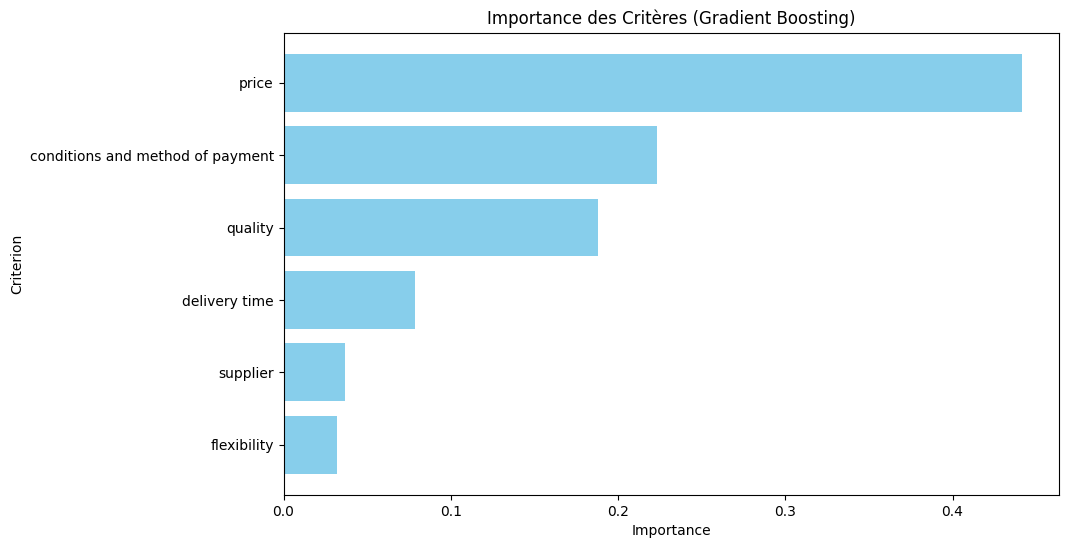

In [15]:
# Visualiser les importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Criterion'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Criterion')
plt.title(f'Importance des Critères ({best_model_name})')
plt.gca().invert_yaxis()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import NearestNeighbors

# Lien direct du fichier
file_url = "./supplier_ranking_grades.xlsx"

# Charger le fichier Excel
supplier_data = pd.read_excel(file_url)

# Afficher les premières lignes
supplier_data.head()

# Préparation des données quantitatives pour la génération
quantitative_cols = supplier_data.columns[1:]  # Toutes les colonnes sauf "supplier"
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(supplier_data[quantitative_cols])

# Utilisation de SMOTE-like méthode pour générer des données synthétiques
def generate_synthetic_data(data, target_size):
    # Initialisation
    n_samples, n_features = data.shape
    n_synthetic = target_size - n_samples
    synthetic_data = []

    # Modèle KNN pour trouver des voisins
    knn = NearestNeighbors(n_neighbors=5).fit(data)
    for _ in range(n_synthetic):
        # Choisir un point au hasard
        idx = np.random.randint(0, n_samples)
        sample = data[idx]

        # Trouver les voisins
        neighbors = knn.kneighbors([sample], return_distance=False)[0]
        neighbor_idx = np.random.choice(neighbors)
        neighbor_sample = data[neighbor_idx]

        # Générer un point synthétique entre le point et son voisin
        alpha = np.random.rand()
        synthetic_point = sample + alpha * (neighbor_sample - sample)
        synthetic_data.append(synthetic_point)

    return np.array(synthetic_data)

# Générer les nouvelles données
target_size = 1000
synthetic_scaled_data = generate_synthetic_data(scaled_data, target_size)

# Revenir à l'échelle d'origine
synthetic_data = scaler.inverse_transform(synthetic_scaled_data)
synthetic_df = pd.DataFrame(synthetic_data, columns=quantitative_cols)

# Ajouter les colonnes identifiant les fournisseurs
synthetic_df.insert(0, 'supplier', range(len(supplier_data) + 1, target_size + 1))

# Fusionner les données existantes et synthétiques
df = pd.concat([supplier_data, synthetic_df], ignore_index=True)

print(f"Nbr de lignes = {df.shape[0]}")
print(f"Nbr de colonnes = {df.shape[1]}")

# Prepare the dataset: Features (X) and target (y)
features = ['quality', 'conditions and method of payment', 'flexibility', 'price', 'delivery time', 'supplier\'s location and traffic connections']
X = df[features]

# Normaliser les données pour une meilleure performance des modèles
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use the average of feature values as the "score" for training
y = X_scaled.mean(axis=1)

pd.DataFrame(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict scores for the dataset
df['score'] = model.predict(X_scaled)

# Calculate performance metrics for the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Display the first few rows of the updated DataFrame, along with performance metrics
# df.head()
pd.DataFrame(y)

# Sélectionner la variable cible (score)
y = df['score']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fonction pour entraîner et évaluer différents modèles
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return model, mse, r2


# Entraîner plusieurs modèles
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Support Vector Regressor": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Neural Network": MLPRegressor(random_state=42, max_iter=1000)
}

results = {}
for model_name, model in models.items():
    trained_model, mse, r2 = train_and_evaluate_model(model, model_name)
    results[model_name] = {
        "model": trained_model,
        "mse": mse,
        "r2": r2
    }

# Sélectionner le meilleur modèle basé sur R2
best_model_name = max(results, key=lambda x: results[x]['r2'])
best_model = results[best_model_name]['model']

feature_importances = (
    best_model.feature_importances_ if hasattr(best_model, 'feature_importances_') else np.abs(best_model.coef_)
    if hasattr(best_model, 'coef_') else np.ones(len(features))  # Cas où les importances ne sont pas disponibles
)

# Importance des caractéristiques
importance_df = pd.DataFrame({'Criterion': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Construction directe de la matrice cohérente à partir des priorités relatives
def generate_consistent_ahp_matrix(priorities):
    n = len(priorities)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            matrix[i, j] = round(priorities[i] / priorities[j], 2)  # Construire la matrice cohérente

    return matrix

# Priorités relatives dérivées des importances des critères
priorities = feature_importances / feature_importances.sum()  # Normalisation des importances

# Générer la matrice cohérente directement
consistent_matrix = generate_consistent_ahp_matrix(priorities)

# Afficher la matrice cohérente
consistent_matrix_df = pd.DataFrame(consistent_matrix, index=features, columns=features)
print("Matrice cohérente générée directement :")
pd.DataFrame(consistent_matrix_df)
print(pd.DataFrame(consistent_matrix_df))

# Calcul des priorités relatives avec la moyenne géométrique
def calculate_priorities_geometric(matrix):
    # Calcul des moyennes géométriques des lignes
    geometric_means = np.prod(matrix, axis=1) ** (1 / matrix.shape[0])
    # Normalisation pour obtenir les priorités relatives
    priorities = geometric_means / geometric_means.sum()
    return priorities

# Calcul de λ_max
def calculate_lambda_max(matrix, priorities):
    # Produit matrice-vecteur pour pondérer les priorités
    weighted_sum = matrix.dot(priorities)
    lambda_max = (weighted_sum / priorities).mean()
    return lambda_max

# Calcul de l'indice de cohérence (IC) et du ratio de cohérence (CR)
def calculate_consistency(matrix, priorities):
    n = matrix.shape[0]
    lambda_max = calculate_lambda_max(matrix, priorities)
    IC = (lambda_max - n) / (n - 1)

    # Indices aléatoires (RI) pour différentes tailles de matrice
    RI_values = {1: 0.00, 2: 0.00, 3: 0.58, 4: 0.90, 5: 1.12,
                 6: 1.24, 7: 1.32, 8: 1.41, 9: 1.45}
    RI = RI_values.get(n, 1.45)  # Valeur par défaut pour n > 9
    CR = IC / RI if RI != 0 else 0
    return IC, CR

# Calcul des priorités relatives
priorities = calculate_priorities_geometric(consistent_matrix_df)

# Calcul de λ_max
lambda_max = calculate_lambda_max(consistent_matrix_df, priorities)

# Calcul de l'indice de cohérence et du ratio de cohérence
IC, CR = calculate_consistency(consistent_matrix_df, priorities)

# Afficher les résultats
print("\nPriorités relatives :")
print(priorities)
print("\nValeur de λ_max :", lambda_max)
print("Indice de cohérence (IC) :", IC)
print("Ratio de cohérence (CR) :", CR)

if CR < 0.1:
    print("La matrice est cohérente.")
else:
    print("La matrice n'est pas cohérente. Veuillez vérifier les jugements.")


Nbr de lignes = 1000
Nbr de colonnes = 13
Matrice cohérente générée directement :
                                             quality  \
quality                                         1.00   
conditions and method of payment                0.25   
flexibility                                     0.35   
price                                           0.26   
delivery time                                   0.09   
supplier's location and traffic connections     0.66   

                                             conditions and method of payment  \
quality                                                                  4.01   
conditions and method of payment                                         1.00   
flexibility                                                              1.40   
price                                                                    1.03   
delivery time                                                            0.36   
supplier's location and traffic connect

In [3]:
supplier_data.head()


,supplier,quality,quantity,conditions and method of payment,serviceability and communicativeness of the supplier,reputation of the supplier and its competence,flexibility,financial condition of the supplier,condition of the supplier's assets,business results and number of employees,price,delivery time,supplier's location and traffic connections
0,1,4,350,3,3,4,4,4,3,5,5,2.0,50
1,2,2,350,2,5,4,3,5,4,6,7,3.0,60
2,3,2,450,3,6,5,4,7,8,9,8,4.0,30
3,4,4,260,3,6,8,5,7,8,9,7,1.0,40
4,5,3,170,3,7,6,2,6,5,4,7,2.0,35
